In [2]:
import pdfplumber

In [87]:
with pdfplumber.open("CM Capital.pdf") as pdf:
    page = pdf.pages[0]
    all_text = ''
    texto = page.extract_text()
    for row in texto:
        all_text += texto
    row = all_text.split('\n')
    print(row[4])
    print(row[7])

02.685.483/0001-30
88


In [40]:
with pdfplumber.open("CM Capital.pdf") as pdf:
    page = pdf.pages[0]
    coluna_nota = page.crop((400, 65, page.width, 75))
    titulos_settings = {
        "vertical_strategy": "explicit",
        "explicit_vertical_lines": [440, 490, 526, 590]
    }
    titulos = coluna_nota.extract_table(titulos_settings)
    print(titulos)
im = coluna_nota.to_image()
im.draw_vlines([440, 490, 526, 590])
im.draw_hlines([])

[['523.536', '1 / 3', '10/12/2019']]


In [46]:
with pdfplumber.open("CM Capital.pdf") as pdf:
    page = pdf.pages[0]
    all_text = ''
    texto = page.extract_text()
    for row in texto:
        all_text += texto
    row = all_text.split('\n')
    # nome da corretora = row[5]
    linha_corretora1 = row[6].split()
    linha_corretora2 = row[8].split()
    obj_corretora = {
        "Corretora": row[5],
        "Backoffice_email": linha_corretora1[-4],
        "Ouvidoria_telefone": linha_corretora2[-4],
        "Ouvidoria_email": linha_corretora2[-1]
    }
    print(obj_corretora)

{'Corretora': 'CM CAPITAL MARKETS CCTVM LTDA', 'Backoffice_email': 'backoffice@cmcapital.com.br)', 'Ouvidoria_telefone': '0800770-1170', 'Ouvidoria_email': 'ouvidoria@cmcapital.com.br)'}


In [71]:
with pdfplumber.open("CM Capital.pdf") as pdf:
    page = pdf.pages[0]
    coluna_corretora = page.crop((10, 100, 180, 120))
    corretora_settings = {
        "horizontal_strategy": "explicit",
        "explicit_horizontal_lines": [101, 110, 119]
    }
    corretora = coluna_corretora.extract_table(corretora_settings)
    print(corretora)
    
im = coluna_corretora.to_image()
im.draw_vlines([])
im.draw_hlines([101, 110, 119])

[['RUA GOMES DE CARVALHO, 1195 - 4º ANDAR'], ['04547004 - VILA OLIMPIA - SAO PAULO - SP']]


In [82]:
with pdfplumber.open("CM Capital.pdf") as pdf:
    page = pdf.pages[0]
    all_text = ''
    texto = page.extract_text()
    for row in texto:
        all_text += texto
    row = all_text.split('\n')

    linha_cliente1 = row[12].split()
    linha_cliente2 = row[14]
    endereco_cliente = ''
    total = 0
    while total <= len(linha_cliente1) - 4:
        endereco_cliente += f" {linha_cliente1[total]}"
        total += 1

    obj_cliente = {
        "Cliente": row[11],
        "Endereco_cliente": f"{endereco_cliente} {linha_cliente2}",
        "numero_do_cliente": row[13],
        "CNPJ_ou_CPF": row[10]
    }
    print(obj_cliente)

 JOSÉ MALAVASI, 468, Casa
{'Cliente': 'AUGUSTO TOBIAS NETO', 'Endereco_cliente': ' JOSÉ MALAVASI, 468, Casa 86430 000 - EUNICE ELEUTÉRIO - SANTO ANTÔNIO DA PLATINA - PR', 'numero_do_cliente': '772175', 'CNPJ_ou_CPF': '060.876.149-40'}


{'negocio_1': {'C_V': 'V', 'Mercadoria': 'WIN FUT Z19', 'Vencimento': '18/12/2019', 'Quantidade': '4', 'Preco_Ajuste': '110.605,00', 'Tipo_do_negocio': 'DAY TRADE', 'Vlr_de_operacao_ajuste_DC': '80,00 D', 'Taxa_operacional': '0,36'}, 'negocio_2': {'C_V': 'V', 'Mercadoria': 'WIN FUT Z19', 'Vencimento': '18/12/2019', 'Quantidade': '3', 'Preco_Ajuste': '110.605,00', 'Tipo_do_negocio': 'DAY TRADE', 'Vlr_de_operacao_ajuste_DC': '60,00 D', 'Taxa_operacional': '0,27'}, 'negocio_3': {'C_V': 'C', 'Mercadoria': 'WIN FUT Z19', 'Vencimento': '18/12/2019', 'Quantidade': '2', 'Preco_Ajuste': '110.585,00', 'Tipo_do_negocio': 'DAY TRADE', 'Vlr_de_operacao_ajuste_DC': '48,00 C', 'Taxa_operacional': '0,18'}, 'negocio_4': {'C_V': 'C', 'Mercadoria': 'WIN FUT Z19', 'Vencimento': '18/12/2019', 'Quantidade': '8', 'Preco_Ajuste': '110.585,00', 'Tipo_do_negocio': 'DAY TRADE', 'Vlr_de_operacao_ajuste_DC': '192,00 C', 'Taxa_operacional': '0,72'}, 'negocio_5': {'C_V': 'V', 'Mercadoria': 'WIN FUT Z19', 'Vencimento

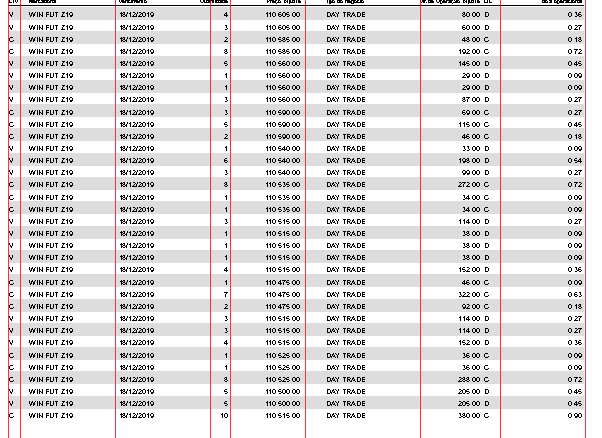

In [6]:
with pdfplumber.open("CM Capital.pdf") as pdf:
    page = pdf.pages[2]
    coluna_negocios = page.crop((10, 190, page.width, 628))
    
    negocios_settings = {
        "vertical_strategy": "explicit",
        "explicit_vertical_lines": [18, 30, 125, 220, 240, 315, 430, 510, 595]
    }
    negocios = coluna_negocios.extract_table(negocios_settings)
    i = 0
    total_negocios = {}
    num_negocio = 1
    while i <= len(negocios) - 1:
        obj_negocios = {
            "C_V": negocios[i][0],
            "Mercadoria": negocios[i][1],
            "Vencimento": negocios[i][2],
            "Quantidade": negocios[i][3],
            "Preco_Ajuste": negocios[i][4],
            "Tipo_do_negocio": negocios[i][5],
            "Vlr_de_operacao_ajuste_DC": negocios[i][6],
            "Taxa_operacional": negocios[i][7]
        }
        total_negocios[f"negocio_{num_negocio}"] = obj_negocios
        num_negocio += 1
        i += 1
        
    print(total_negocios)
im = coluna_negocios.to_image()
im.draw_vlines([
    18, 30, 125, 220, 240, 315, 430, 510, 595
])

{'Vendas_disponivel': '0,00', 'Compra_disponivel': '0,00', 'Vendas_opcoes': '0,00', 'Compras_opcoes': '0,00', 'Valor_dos_negocios': '1.295,00 C', 'IRRF': '0,00', 'Taxa_Corretora_Intermediacao': '0,00', 'Taxa_Corretora_IMPLANT': '52,20', 'Taxa_registro_BMeF': '46,40', 'Taxa_registro_BMeF_emol': '23,20 D', 'IRRF_day_Trade_projecao': '-11,73', 'Outros_custos': '0,00', 'ISS': '2,11', 'Ajuste_de_posicao': '0,00 C', 'Ajuste_day_trade': '1.295,00 C', 'Total_das_despesas': '121,80 D', 'Outros': '0,00', 'IRRF_corretagem': '0,00', 'Total_Conta_Investimento': '0,00 C', 'Total_Conta_Normal': '1.161,47 C', 'Total_liquido': '0,00 C', 'Total_liquido_da_nota': '1.161,47 C'}


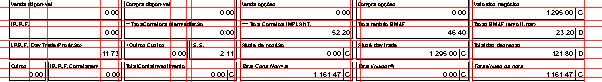

In [8]:
with pdfplumber.open("CM Capital.pdf") as pdf:
    page = pdf.pages[2]
    coluna_inferior = page.crop((10, 628, page.width, 710))
    
    inferior_settings = {
        "vertical_strategy": "explicit",
        "horizontal_strategy": "text",
        "explicit_vertical_lines": [ 39, 57, 110, 128, 180, 196, 201, 244, 250, 360,
    370, 479, 482, 594],
        "explicit_horizontal_lines": [635, 648, 654, 668, 675, 686, 696, 705]
    }
    
    dados = coluna_inferior.extract_table(inferior_settings)
    
    if len(dados) == 9:
        obj_resumo = {
            "Vendas_disponivel": dados[1][2],
            "Compra_disponivel": dados[1][6],
            "Vendas_opcoes": dados[1][8],
            "Compras_opcoes": dados[1][10],
            "Valor_dos_negocios": dados[1][11],
            "IRRF": dados[4][2],
            "Taxa_Corretora_Intermediacao": dados[4][6],
            "Taxa_Corretora_IMPLANT": dados[4][8],
            "Taxa_registro_BMeF": dados[4][10],
            "Taxa_registro_BMeF_emol": dados[4][11],
            "IRRF_day_Trade_projecao": dados[7][2],
            "Outros_custos": dados[7][4],
            "ISS": dados[7][6],
            "Ajuste_de_posicao": dados[7][8],
            "Ajuste_day_trade": dados[7][10],
            "Total_das_despesas": dados[7][11],
            "Outros": '',
            "IRRF_corretagem": '',
            "Total_Conta_Investimento": '',
            "Total_Conta_Normal": '',
            "Total_liquido": '',
            "Total_liquido_da_nota": ''
        }
    else:
        obj_resumo = {
            "Vendas_disponivel": dados[1][2],
            "Compra_disponivel": dados[1][6],
            "Vendas_opcoes": dados[1][8],
            "Compras_opcoes": dados[1][10],
            "Valor_dos_negocios": dados[1][11],
            "IRRF": dados[4][2],
            "Taxa_Corretora_Intermediacao": dados[4][6],
            "Taxa_Corretora_IMPLANT": dados[4][8],
            "Taxa_registro_BMeF": dados[4][10],
            "Taxa_registro_BMeF_emol": dados[4][11],
            "IRRF_day_Trade_projecao": dados[7][2],
            "Outros_custos": dados[7][4],
            "ISS": dados[7][6],
            "Ajuste_de_posicao": dados[7][8],
            "Ajuste_day_trade": dados[7][10],
            "Total_das_despesas": dados[7][11],
            "Outros": dados[10][0],
            "IRRF_corretagem": dados[10][2],
            "Total_Conta_Investimento": dados[10][6],
            "Total_Conta_Normal": dados[10][8],
            "Total_liquido": dados[10][10],
            "Total_liquido_da_nota": dados[10][11]
        }
    print(obj_resumo)
im = coluna_inferior.to_image()
im.draw_vlines([
    39, 57, 110, 128, 180, 196, 201, 244, 250, 360,
    370, 479, 482, 594
])
im.draw_hlines([
    635, 648, 654, 668, 675, 686, 696, 705
])

In [54]:
with pdfplumber.open("CM Capital.pdf") as pdf:
    page = pdf.pages[0]
    all_text = ''
    texto = page.extract_text()
    for row in texto:
        all_text += texto
    row = all_text.split('\n')
   
    informacoes_corretagem = {
        "info1": row[-10],
        "info2": row[-9],
        "info3": row[-8],
        "info4": row[-7],
        "info5": row[-6],
        "info6": f"{row[-5]} {row[-4]} {row[-3]}",
        "info7": f"{row[-2]} {row[-1]}"
    }
    print(informacoes_corretagem)

{'info1': '+ Custos BM&F, conforme Ofício Circular BM&F 079/2007-DG.', 'info2': '- Exercício de opções = EXO', 'info3': '- OZ1 = 249,75 grs. / OZ2 = 9,990 grs. / OZ3 = 0,225 grs.', 'info4': '@ Corretora ou Pessoa Vinculada atuou na Contra Parte', 'info5': '* Negócios gerados automaticamente pelo sistema.', 'info6': '** Valores pagos conforme previsão do Contrato de Transferência de negócios realizados na BMF (Repasse / Brokerage), celebrado entre as Corretoras Intermediadoras e a Corretora IMPLANTAÇÃ', 'info7': '*** Taxa referente à liquidação das operações intermediadas por Terceiros e as operações feitas integralmente pela Corretora I MPLANTAÇÃ'}
